# Assignmet - 3

Pooja Bandal

12th. March, 2022

----

### Start by cloning the repository

In [3]:
!git clone https://github.com/bandpooja/Assignment_3.git

Cloning into 'Assignment_3'...
remote: Enumerating objects: 99, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 99 (delta 33), reused 56 (delta 12), pack-reused 0
Unpacking objects: 100% (99/99), done.


### Install all the requirements

In [4]:
!pip install -r 'Assignment_3/requirements.txt'

     |████████████████████████████████| 287 kB 5.4 MB/s 


### Import the modules

In [5]:
import sys
sys.path.append('./Assignment_3')
from assignment_3 import Assignment3

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package perluniprops to /root/nltk_data...
[nltk_data]   Unzipping misc/perluniprops.zip.


In [6]:
import matplotlib.pyplot as plt
import os
import os.path as osp
from tqdm import tqdm
import warnings

### Run the experiment

In [7]:
warnings.filterwarnings("ignore")
model_loc = 'result'
corpora = ['news', 'romance']
# load the simlex data

results = {}
for corpus in tqdm(corpora, desc='Fitting for corpus'):
    results[corpus] = {}
    model_loc_ = osp.join(model_loc, corpus)
    os.makedirs(model_loc_, exist_ok=True)

    exp = Assignment3(model_loc_, corpus=corpus, 
                      file_loc=r'./Assignment_3/data/SimLex-999.txt')
    exp.load_simlex_data()
    exp.initiate_evaluator()
    exp.load_data()
    ms = exp.tfidf()
    results[corpus]['tfidf'] = ms
    ms = exp.word2vec()
    results[corpus]['word2vec'] = ms

Fitting for corpus:   0%|          | 0/2 [00:00<?, ?it/s]

######## Simlex - loaded dataframe########
   word1        word2 SimLex999
0    old          new      1.58
1  smart  intelligent       9.2
2   hard    difficult      8.77
3  happy     cheerful      9.55
4   hard         easy      0.95



Fitting for corpus:  50%|█████     | 1/2 [00:29<00:29, 29.62s/it]

######## Simlex - loaded dataframe########
   word1        word2 SimLex999
0    old          new      1.58
1  smart  intelligent       9.2
2   hard    difficult      8.77
3  happy     cheerful      9.55
4   hard         easy      0.95



Fitting for corpus: 100%|██████████| 2/2 [02:30<00:00, 75.18s/it]

In [8]:
print(results)

{'news': {'tfidf': {'ndcg average': 0.008722901990314438}, 'word2vec': {'ndcg average': 0.009158846094425745}}, 'romance': {'tfidf': {'ndcg average': 0.006703564142796791}, 'word2vec': {'ndcg average': 0.012464054114885171}}}


### Visualize the result

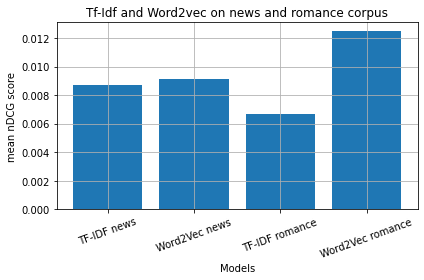

In [10]:
x_list = [1, 2, 3, 4]
y_list = []
for i in corpora:
    y_list.append(results[i]['tfidf']['ndcg average'])
    y_list.append(results[i]['word2vec']['ndcg average'])

plt.bar(x_list, y_list)
labels = ['TF-IDF news', 'Word2Vec news', 'TF-IDF romance', 'Word2Vec romance']
plt.xticks(x_list, labels, rotation=20)
plt.title('Tf-Idf and Word2vec on news and romance corpus')
plt.xlabel('Models')
plt.ylabel('mean nDCG score')
plt.grid()
plt.tight_layout()
plt.savefig(osp.join(model_loc, f'result.png'))
plt.show()